In [85]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [43]:
bike = pd.read_csv("Bike Sharing Dataset.csv", usecols=[2,5,8,9,10,16])
bike.info()
bike.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   hr          17379 non-null  int64  
 2   workingday  17379 non-null  object 
 3   weathersit  17379 non-null  object 
 4   temp        17379 non-null  float64
 5   cnt         17379 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 814.8+ KB


,season,hr,workingday,weathersit,temp,cnt
0,spring,0,no,clear,0.24,16
1,spring,1,no,clear,0.22,40
2,spring,2,no,clear,0.22,32
3,spring,3,no,clear,0.24,13
4,spring,4,no,clear,0.24,1


In [44]:
bike.info()
print(bike.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   hr          17379 non-null  int64  
 2   workingday  17379 non-null  object 
 3   weathersit  17379 non-null  object 
 4   temp        17379 non-null  float64
 5   cnt         17379 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 814.8+ KB
season        0
hr            0
workingday    0
weathersit    0
temp          0
cnt           0
dtype: int64


In [45]:
bike['workingday2'] = bike.workingday.factorize()[0]
bike['weathersit2'] = bike.weathersit.factorize()[0]
est = smf.ols('cnt ~ hr + workingday2 + temp', bike).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2259.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:04:36   Log-Likelihood:            -1.1218e+05
No. Observations:               17379   AIC:                         2.244e+05
Df Residuals:                   17375   BIC:                         2.244e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -84.6416      3.906    -21.669      0.000     -92.298     -76.985
hr              9.0494      0.170     53.100      0.000       8.715       9.383
workingday2     3.7938      2.512      1.511      0.131      -1.129       8.717
temp          336.0729      6.129     54.834      0.000     324.060     348.086
==============================================================================
Omnibus:                     3951.373   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8470.361
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
df = pd.read_csv("Bike Sharing Dataset.csv")

df['season2'] = df.season.factorize()[0]
df['mnth2'] = df.mnth.factorize()[0]
df['weekday2'] = df.weekday.factorize()[0]
df['workingday2'] = df.workingday.factorize()[0]
df['weathersit2'] = df.weathersit.factorize()[0]
df['holiday2'] = df.holiday.factorize()[0]

threshold = 280
df['cnt_binary'] = (df['cnt'] > threshold).astype(int)

df.head()
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season2,mnth2,weekday2,workingday2,weathersit2,holiday2,cnt_binary
17374,17375,31/12/2012,spring,1,december,19,no,monday,yes,misty,...,11,108,119,0,11,2,1,1,0,0
17375,17376,31/12/2012,spring,1,december,20,no,monday,yes,misty,...,8,81,89,0,11,2,1,1,0,0
17376,17377,31/12/2012,spring,1,december,21,no,monday,yes,clear,...,7,83,90,0,11,2,1,0,0,0
17377,17378,31/12/2012,spring,1,december,22,no,monday,yes,clear,...,13,48,61,0,11,2,1,0,0,0
17378,17379,31/12/2012,spring,1,december,23,no,monday,yes,clear,...,12,37,49,0,11,2,1,0,0,0


In [47]:
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [48]:
est = smf.logit('cnt_binary ~ season2 + workingday2 + temp + weathersit2 + windspeed', df).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.489646
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-3.929701,0.086411,-45.476858,0.000000e+00,-4.099063,-3.760338
season2,0.256070,0.020201,12.676372,7.994722e-37,0.216477,0.295662
workingday2,-0.162422,0.040600,-4.000499,6.320918e-05,-0.241997,-0.082846
temp,4.300669,0.112147,38.348441,0.000000e+00,4.080865,4.520474
weathersit2,-0.384643,0.032792,-11.729922,8.954072e-32,-0.448914,-0.320373
windspeed,1.847158,0.158103,11.683223,1.552935e-31,1.537281,2.157036


In [35]:
X_train = df[df.workingday == 'yes'].temp.values.reshape(-1,1)
y = df[df.workingday == 'yes'].cnt_binary

X_train2 = df[df.workingday == 'no'].temp.values.reshape(-1,1)
y2 = df[df.workingday == 'no'].cnt_binary

X_test = np.arange(df.temp.min(), df.temp.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train,y)
clf2.fit(X_train2,y2)

prob = clf.predict_proba(X_test)
prob2 = clf.predict_proba(X_test)

In [51]:
df.groupby(['workingday', 'cnt_binary']).size().unstack('cnt_binary')

cnt_binary,0,1
workingday,,
no,4077,1437
yes,8948,2917


In [55]:
X = df[['temp', 'workingday2', 'weathersit2']].to_numpy()
y = df.cnt_binary.to_numpy()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X,y).predict(X)

df_ = pd.DataFrame({'True 75th per': y,
                    'Predicted 7th per': y_pred})
df_.replace(to_replace={0: 'no', 1: 'yes'}, inplace=True)
df_.groupby(['True 75th per','Predicted 7th per']).size().unstack('True 75th per')

True 75th per,no,yes
Predicted 7th per,,
no,12287,3430
yes,738,924


In [71]:
df = pd.read_csv("Bike Sharing Dataset.csv")
df['season2'] = df.season.factorize()[0]
df['mnth2'] = df.mnth.factorize()[0]
df['weekday2'] = df.weekday.factorize()[0]
df['workingday2'] = df.workingday.factorize()[0]
df['weathersit2'] = df.weathersit.factorize()[0]
df['holiday2'] = df.holiday.factorize()[0]

threshold = 280
df['cnt_binary'] = (df['cnt'] > threshold).astype(int)

In [78]:
X = df[['temp', 'workingday2', 'weathersit2', 'season2', 'mnth2', 'weekday2', 'holiday2', 'hum']]
y = df.cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [79]:
regr = RandomForestRegressor(max_features=5, random_state=1)
regr.fit(X_train, y_train)

RandomForestRegressor(max_features=5, random_state=1)

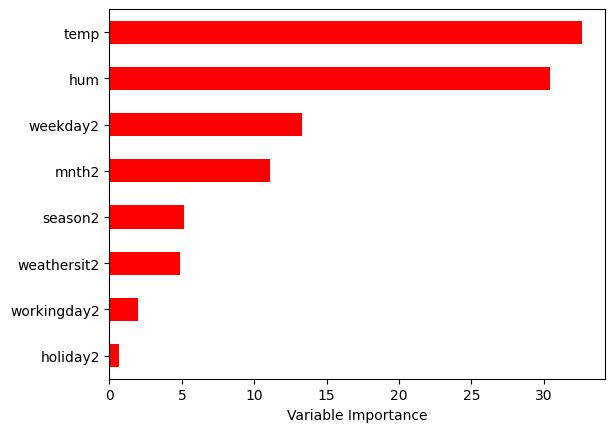

In [80]:
Importance = pd.DataFrame({'Importance':regr.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [86]:
pca = PCA()
X_red = pca.fit_transform(scale(X))

print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:4,:5]

(8, 8)


,0,1,2,3,4,5
0,-0.320384,0.007579,-0.318543,-0.117829,0.874884,-0.077190
1,-0.138731,-0.689593,-0.006454,0.021155,-0.032658,-0.021261
2,-0.052968,-0.042766,0.681481,-0.007122,0.287907,0.669171
3,-0.648760,0.138058,-0.068575,0.005514,-0.171459,0.092262
4,-0.629592,0.148789,-0.023700,0.052087,-0.302038,0.122985


In [87]:
print(X_red.shape)
print(pca.explained_variance_)
pd.DataFrame(X_red).loc[:4,:5]

(17379, 8)
[2.01059874 1.82011633 1.44940941 0.99384761 0.82001409 0.55806879
 0.18756947 0.16083591]


,0,1,2,3,4,5
0,2.555051,1.569572,0.790697,-0.597007,-0.483294,-1.299675
1,2.598670,1.567266,0.789909,-0.584482,-0.579296,-1.254211
2,2.598670,1.567266,0.789909,-0.584482,-0.579296,-1.254211
3,2.617095,1.560459,0.587444,-0.595291,-0.514067,-1.075000
4,2.617095,1.560459,0.587444,-0.595291,-0.514067,-1.075000
